In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

data= pd.read_csv("Desktop/SFRT-Topas/results/dosetomedium_grid_multitest1.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
print(data.columns)

for i in np.arange(2,11):
    data1=pd.read_csv("Desktop/SFRT-Topas/results/dosetomedium_grid_multitest"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
    data.dose=data.dose + data1.dose
    
data2=pd.read_csv("Desktop/SFRT-Topas/dosetomedium_grid_Mid_10MV_eureka.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
col='grid'
energy='10 MV'
hist="full phsp"
CSD=1.0
x=np.arange(-2.49,2.49+0.02,0.02)

dose1=np.zeros((250,250))
dose2=np.zeros((250,250))
dose3=np.zeros((250,250))
for i in np.arange(0,len(data.dose),20):
    dose1[data.x[i]][data.y[i]]=data.dose[i]
    dose2[data.x[i+1]][data.y[i+1]]=data.dose[i+1]
    dose3[data.x[i+2]][data.y[i+2]]=data.dose[i+2]

dose1_2=np.zeros((250,250))
dose2_2=np.zeros((250,250))
dose3_2=np.zeros((250,250))
for i in np.arange(0,len(data.dose),20):
    dose1_2[data2.x[i]][data2.y[i]]=data2.dose[i]
    dose2_2[data2.x[i+1]][data2.y[i+1]]=data2.dose[i+1]
    dose3_2[data2.x[i+2]][data2.y[i+2]]=data2.dose[i+2]

Index(['x', 'y', 'z', 'dose'], dtype='object')


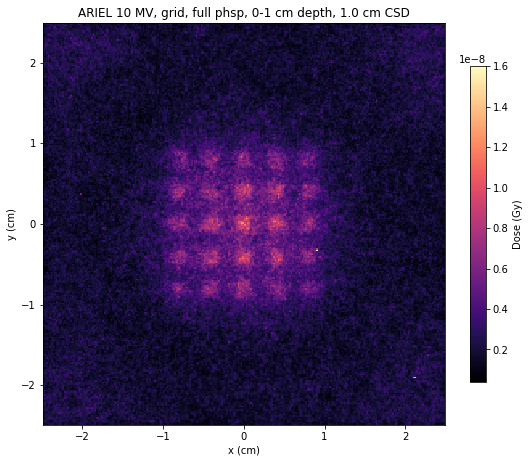

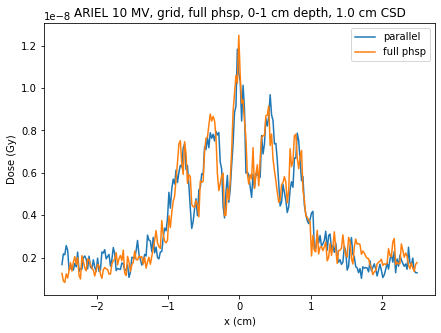

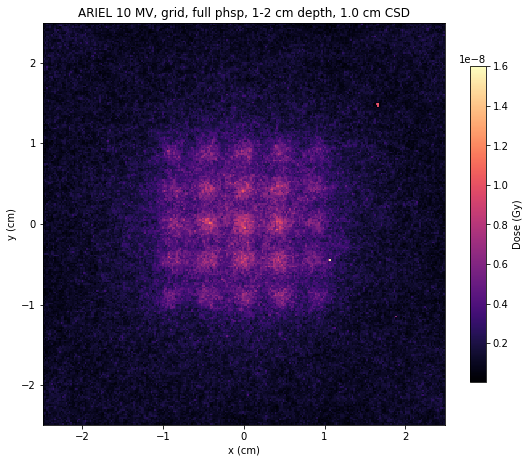

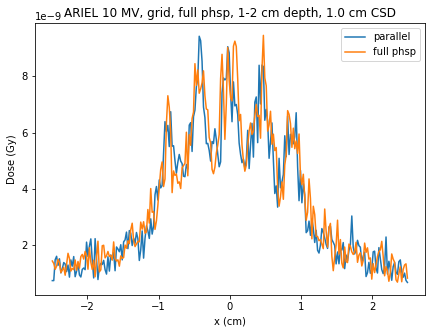

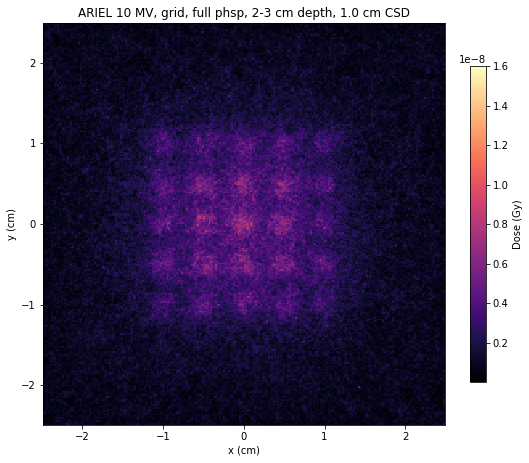

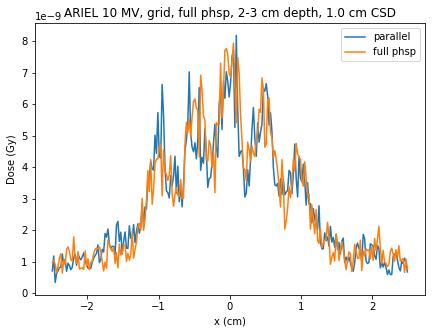

In [4]:
ybins=2 #should be even

figure(4,figsize=(9,8))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 0-1 cm depth, '+str(CSD)+' cm CSD')
plt.imshow(dose1.T,cmap='magma',vmax=1.6e-8,extent=(-2.49,2.49,-2.49,2.49))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose (Gy)')

figure(5,figsize=(7,5))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 0-1 cm depth, '+str(CSD)+' cm CSD')
plt.plot(x,(dose1.T[125]+dose1.T[124])/2,label='parallel')
plt.plot(x,(dose1_2.T[125]+dose1_2.T[124])/2,label='full phsp')
plt.xlabel('x (cm)')
plt.ylabel('Dose (Gy)')
plt.legend()

figure(6,figsize=(9,8))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 1-2 cm depth, '+str(CSD)+' cm CSD')
plt.imshow(dose2.T,cmap='magma',vmax=1.6e-8,extent=(-2.49,2.49,-2.49,2.49))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose (Gy)')

figure(7,figsize=(7,5))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 1-2 cm depth, '+str(CSD)+' cm CSD')
plt.plot(x,(dose2.T[125]+dose2.T[124])/2,label='parallel')
plt.plot(x,(dose2_2.T[125]+dose2_2.T[124])/2,label='full phsp')
plt.xlabel('x (cm)')
plt.ylabel('Dose (Gy)')
plt.legend()

figure(8,figsize=(9,8))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 2-3 cm depth, '+str(CSD)+' cm CSD')
plt.imshow(dose3.T,cmap='magma',vmax=1.6e-8,extent=(-2.49,2.49,-2.49,2.49))
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.colorbar(shrink=0.725,label='Dose (Gy)')

figure(9,figsize=(7,5))
plt.title('ARIEL '+str(energy)+', '+col+', '+str(hist)+', 2-3 cm depth, '+str(CSD)+' cm CSD')
plt.plot(x,(dose3.T[125]+dose3.T[124])/2,label='parallel')
plt.plot(x,(dose3_2.T[125]+dose3_2.T[124])/2,label='full phsp')
plt.xlabel('x (cm)')
plt.ylabel('Dose (Gy)')
plt.legend()

In [ ]:
x=np.arange(0,250)
xdose=[]
xdose0cm=[]

xbins=250
xwidth=0.02
ybins=250
ywidth=0.02
zbins=20
zwidth=1

yrange=0.02*1 #need odd number
#print(x,np.arange(0,len(data.x),4999))
for i in np.arange(0,len(data.x),xbins*zbins):
    for k in np.arange(ybins*zbins/2-(yrange/2/ywidth)*zbins+10,ybins*zbins/2+(yrange/2/ywidth)*zbins+10,20):
        xdose.append(data.dose[int(i+k)])
    xdose0cm.append(np.mean(xdose))
    xdose=[]
xdose0cm3=np.array(xdose0cm)

xdose3cm=[]
xdose=[]
for i in np.arange(0,len(data.x),xbins*zbins):
    for k in np.arange(ybins*zbins/2-(yrange/2/ywidth)*zbins+10,ybins*zbins/2+(yrange/2/ywidth)*zbins+10,20):
        xdose.append(data.dose[int(i+k+3)])
    xdose3cm.append(np.mean(xdose))
    xdose=[]
xdose3cm=np.array(xdose3cm)

xdose6cm=[]
xdose=[]
for i in np.arange(0,len(data.x),5000):
    for k in np.arange(ybins*zbins/2-(yrange/2/ywidth)*zbins+10,ybins*zbins/2+(yrange/2/ywidth)*zbins+10,20):
        xdose.append(data.dose[int(i+k+6)])
    xdose6cm.append(np.mean(xdose))
    xdose=[]
xdose6cm=np.array(xdose6cm)

figure(8,figsize=(7,5))
plt.plot(x,xdose0cm1,label='lightning')
plt.plot(x,xdose0cm2,label='mid')
plt.plot(x,xdose0cm3,label='hobbler')
plt.title('Dose (Gy),'+str(energy)+' ARIEL, '+col+', '+str(hist)+'M, 0-1 cm, '+str(CSD)+' cm CSD')
plt.legend()

figure(1,figsize=(7,5))
plt.plot(x,xdose0cm)
plt.title('Dose (Gy), x profile,'+str(energy)+' ARIEL, '+col+', '+str(hist)+'k, 0-1 cm, '+str(CSD)+' cm CSD')

figure(2,figsize=(7,5))
plt.plot(x,xdose3cm)
plt.title('Dose (Gy), x profile, '+str(energy)+' ARIEL, '+col+', '+str(hist)+'k, 3-4 cm, '+str(CSD)+' cm CSD')


figure(3,figsize=(7,5))
plt.plot(x,xdose6cm)
plt.title('Dose (Gy), x profile, '+str(energy)+' ARIEL, '+col+', '+str(hist)+'k, 6-7 cm, '+str(CSD)+' cm CSD')
